<a href="https://colab.research.google.com/github/juel-123/Bike_sharing_demand.ipynb/blob/main/Bike_sharing_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Importing dependencies*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_original= pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = 'unicode_escape')

In [3]:
df= df_original.copy()

In [4]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# *Understand more about dataset*

##*Dataset first view*

In [5]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


##*Dataset rows and column count*

In [7]:
#Dataset rows and column count
df.shape

(8760, 14)

In [8]:
#Getting all the columns
print("features of the dataset:")
print(df.columns)

features of the dataset:
Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


##*Dataset information*

In [9]:
#Check details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
# Check duplicate values in the dataset
len(df[df.duplicated()])

0

In [11]:
# check no of unique values for each variable in the dataset
for i in df.columns.tolist():
  unique_count = df[i].nunique()
  print(f"The number of items in '{i}' : {unique_count}")


The number of items in 'Date' : 365
The number of items in 'Rented Bike Count' : 2166
The number of items in 'Hour' : 24
The number of items in 'Temperature(°C)' : 546
The number of items in 'Humidity(%)' : 90
The number of items in 'Wind speed (m/s)' : 65
The number of items in 'Visibility (10m)' : 1789
The number of items in 'Dew point temperature(°C)' : 556
The number of items in 'Solar Radiation (MJ/m2)' : 345
The number of items in 'Rainfall(mm)' : 61
The number of items in 'Snowfall (cm)' : 51
The number of items in 'Seasons' : 4
The number of items in 'Holiday' : 2
The number of items in 'Functioning Day' : 2


In [12]:
# missing values/ null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

##*What did we get from the dataset?*



*   There are 1870 observations and 14 features.
*  In a day there are 24 hours and we have 365 days a year so 365 multiplied by 24 = 1870 which represents the number of line in dataset.
*   There are no null values.
*  Thre are no duplicate values.
*  Date has object type data type need to change into datetime data type.












# *Understanding about the variables*

In [13]:
# Dataset columns
print(df.columns.tolist())

['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [14]:
# Looking for the description of the data to get insights
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


##*Feature description*

Breakdown of the features

Date: The date of the day for the 365 days , it is object type we need to convert into Datetime format.

Rented Bike Count: Number of rented bike per hour which is our dependent variable and we need predict that.

Hour: The hour of the day from 0 to 23 , type: int,we need convert category datatype.

Temperature(°C):Temperature in celcius , type:int.

Humidity(%) : Humidity is in percentage , type: int.

Wind speed(m/s) : Speed of the wind in m/s, type:Float.

Visibilty(10m): Visibility in m ,type:int.

Dew point temperature: Temperature at the begining of the day, type:float

Solar Radiation (MJ/m2): Sun contribution, type: float

Rainfall(mm): Amount of raining in mm, type:Float

Snowfall(cm): Amount of snowing in cm, type: float

Seasons: Seasons of the year, type:Str

Holiday: If the day holiday or not, type: str

Functioning day: if the day is Functioning or not, type: str.





##*Preprocessing the dataset*

some of features in dataset is too large large and clumsy so we need to rename it.

In [15]:
# Renaming the columns in the dataset
df =df.rename({'Rented Bike Count':'Rented_Bike_count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temp','Solar Radiation (MJ/m2)':'solar_radtion','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall'})



* In the dataset the Date has type Object , so we need to convert into String and split into 'year', 'month', 'day' columns as category type,.




In [16]:
# converting date object as string
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-16-fc74bece67fb>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [17]:
df['year']= df['Date'].dt.year
df['Month']= df['Date'].dt.month
df['day']=df['Date'].dt.day_name()


In [18]:
# creating the new column 'weekdays_weekend' and drop the column "Date", 'Day', 'Year'
df["weekdays_weekend"]= df['day'].apply(lambda x: 1 if x == 'Saturday' or x == 'Sunday' else 0)
df= df.drop(columns=['Date','day','year'], axis= 1)




*   so converted the date column into year, day, month.
*   I dropped year, day, date column because i don't see any analysis can be drawn from it ,to make insightful i extracted weekdays and weekends from the day column .



In [19]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


###*Dew point Temperature vs Temperature*

We know that Dew point temperature(°C)is related to Temperature . so let's visualize the relationship through Scatter plot.

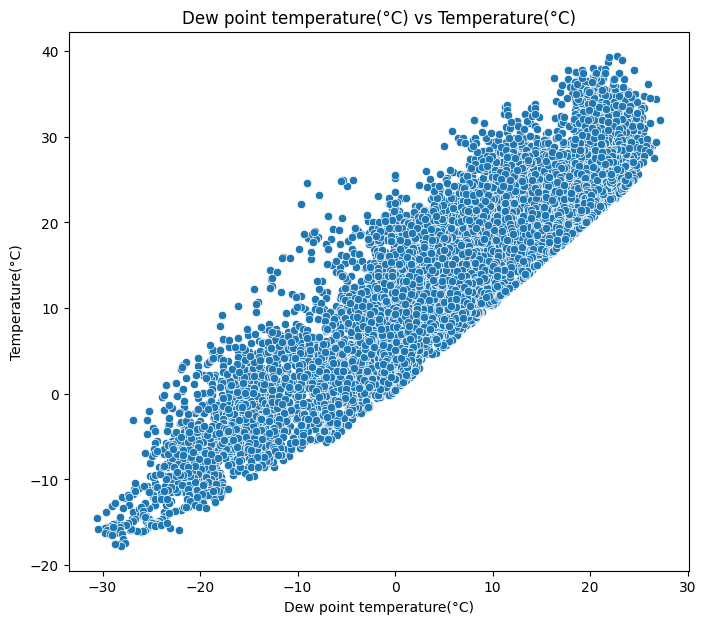

In [20]:
#visualize scatter plot between Dew point temperature(°C) and temperature
plt.figure(figsize=(8,7))
sns.scatterplot(x = df['Dew point temperature(°C)'],y =df['Temperature(°C)'],data= df)
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Temperature(°C)')
plt.title('Dew point temperature(°C) vs Temperature(°C)')
plt.show()

In [21]:
# correlation
df[['Dew point temperature(°C)' , 'Temperature(°C)']].corr()

,Dew point temperature(°C),Temperature(°C)
Dew point temperature(°C),1.000000,0.912798
Temperature(°C),0.912798,1.000000


As we can see from the visualization and correlation that both are highly correlated with each other. so we need to remove one of it to get better performance and to avoid model complexity.

In [22]:
# Dropping dew point temp
df.drop(columns=['Dew point temperature(°C)'],inplace= True, axis =1)

##*Exploratory Data Analysis*

In [23]:
#Statistical data
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,weekdays_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,12.000000,1.000000


###*Analyze the distribtion of dependent variable*

In [24]:
dependent_variable=['Rented Bike Count']

<ipython-input-25-13a54b40111e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[dependent_variable])


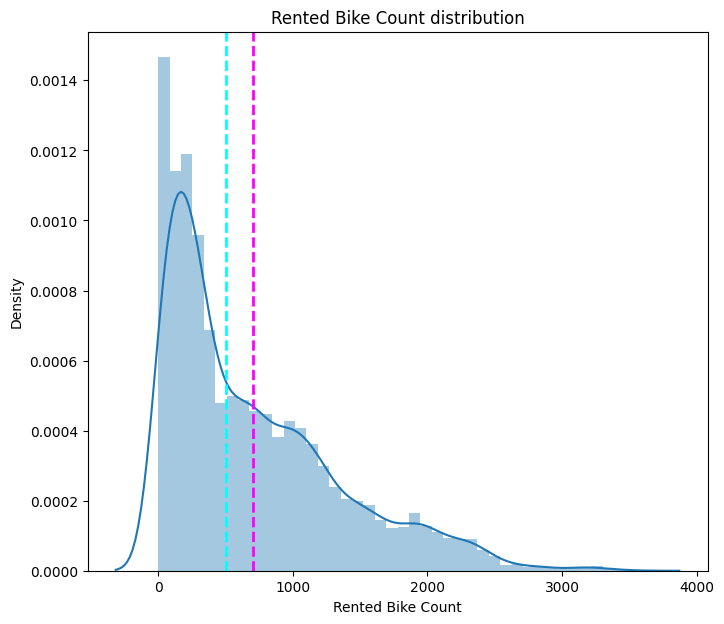

In [25]:
plt.figure(figsize=(8,7))
sns.distplot(df[dependent_variable])
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0] +' distribution')
plt.axvline(df[dependent_variable[0]].mean(),color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()


In [26]:
#skew of the dependent variable
df[dependent_variable].skew()

Rented Bike Count    1.153428
dtype: float64



*  As we can see the dependent variable is postively right skewed.
*  The ideal dependent variable should be normally distributed.
*  To achieve normal distribution we can use log , sqrt etc to transform.






###*Log Transformation*

<ipython-input-27-d33dc8eb1bca>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df[dependent_variable]))


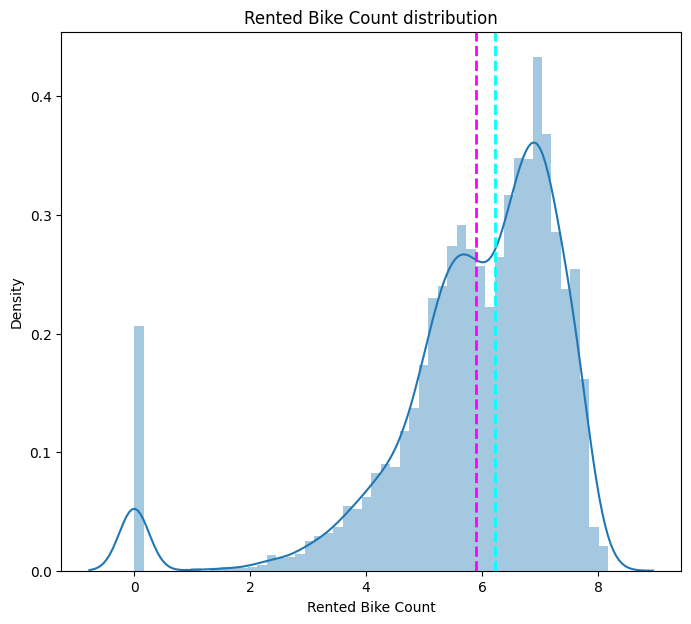

In [27]:
plt.figure(figsize=(8,7))
sns.distplot(np.log1p(df[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0] +' distribution')
plt.axvline(np.log1p(df[dependent_variable[0]]).mean(),color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df[dependent_variable[0]]).median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [28]:
# checking the skewness
np.log1p(df[dependent_variable]).skew()

Rented Bike Count   -1.832199
dtype: float64

The magnitude of the skew increases in log tranformation

###*Square-root Transformation*

<ipython-input-29-0a11d4873d0d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df[dependent_variable]))


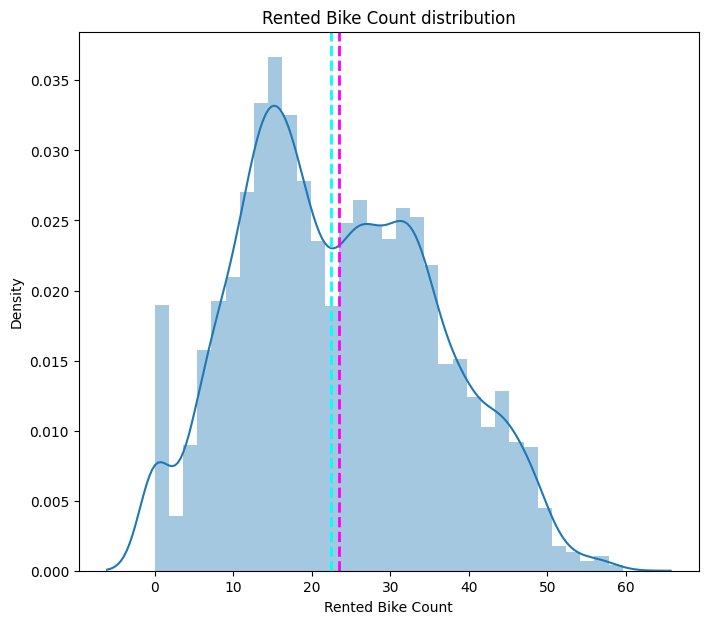

In [29]:
plt.figure(figsize=(8,7))
sns.distplot(np.sqrt(df[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0] +' distribution')
plt.axvline(np.sqrt(df[dependent_variable[0]]).mean(),color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(df[dependent_variable[0]]).median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [30]:
# checking the skewness
np.sqrt(df[dependent_variable]).skew()

Rented Bike Count    0.237362
dtype: float64

We can see that the skewness reduced using square root transformation and normal distribution . hence, we can use this during the modelling.

##*Analyzing continous independent variables*

In [31]:
# continous independent variables
continous_var=['Temperature(°C)'	,'Humidity(%)',	'Wind speed (m/s)'	,'Visibility (10m)'	,'Solar Radiation (MJ/m2)',	'Rainfall(mm)'	,'Snowfall (cm)'	]

<ipython-input-32-9dbc4aca6b7c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


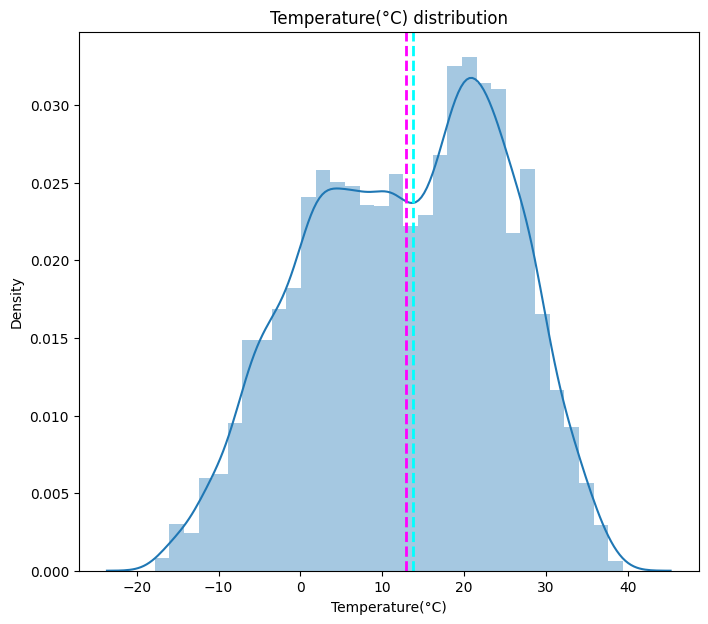

<ipython-input-32-9dbc4aca6b7c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


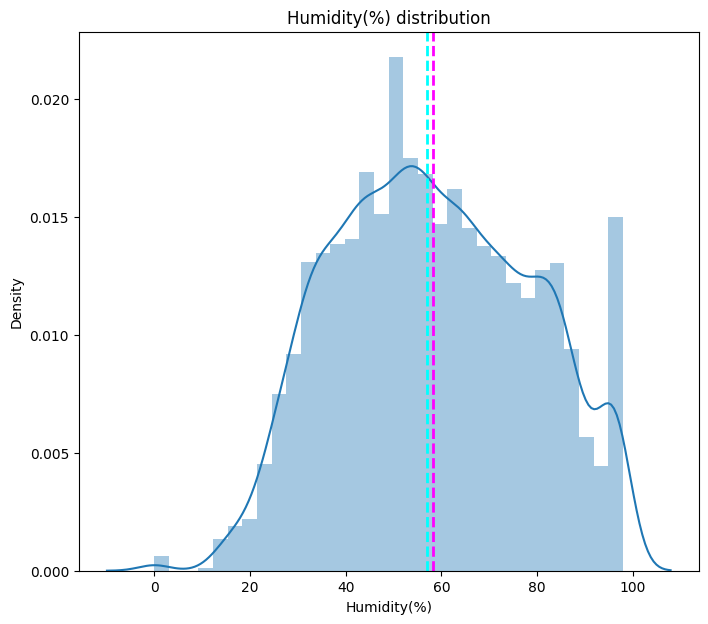

<ipython-input-32-9dbc4aca6b7c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


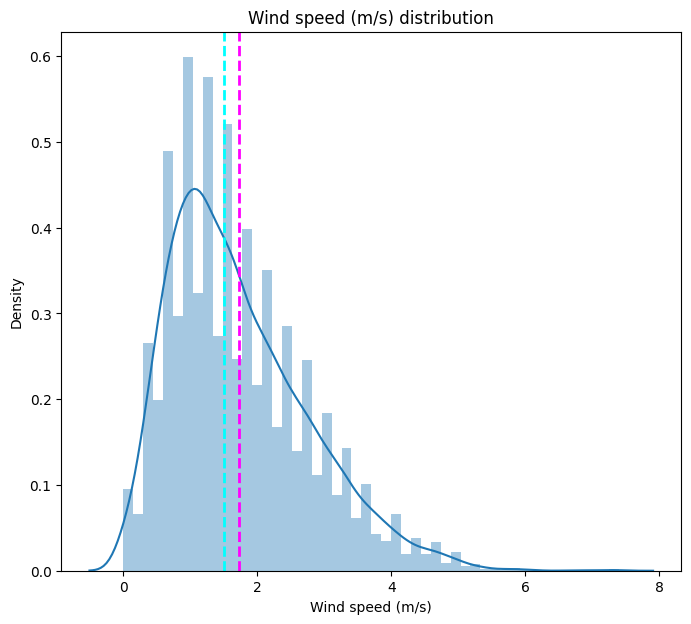

<ipython-input-32-9dbc4aca6b7c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


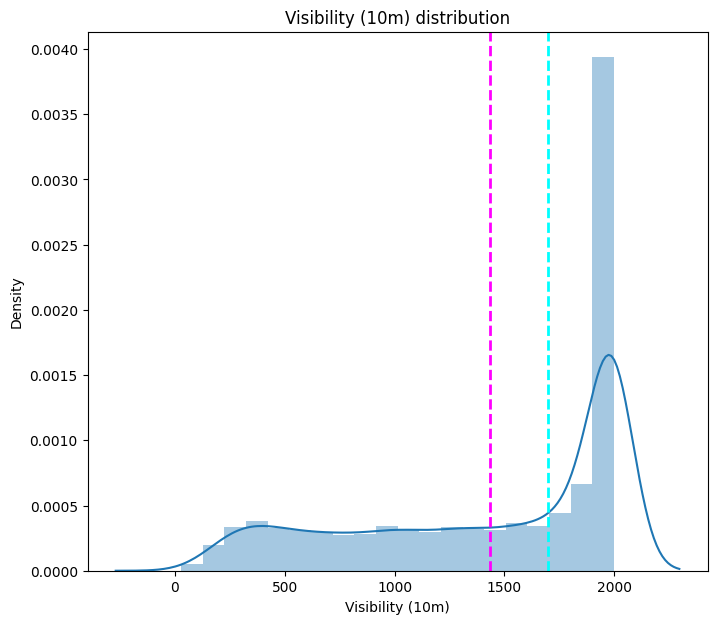

<ipython-input-32-9dbc4aca6b7c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


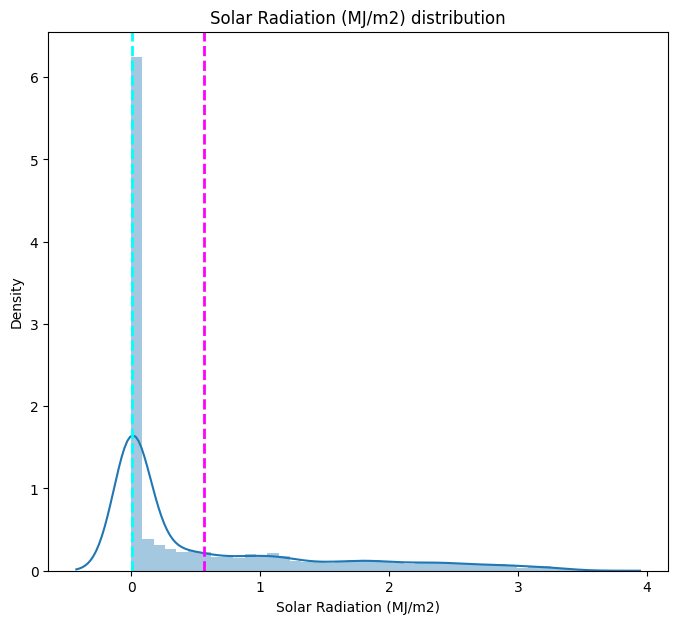

<ipython-input-32-9dbc4aca6b7c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


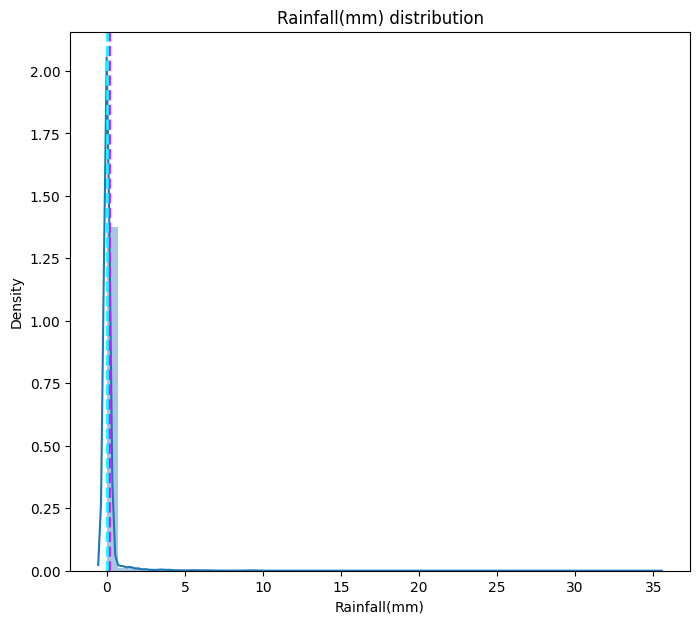

<ipython-input-32-9dbc4aca6b7c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


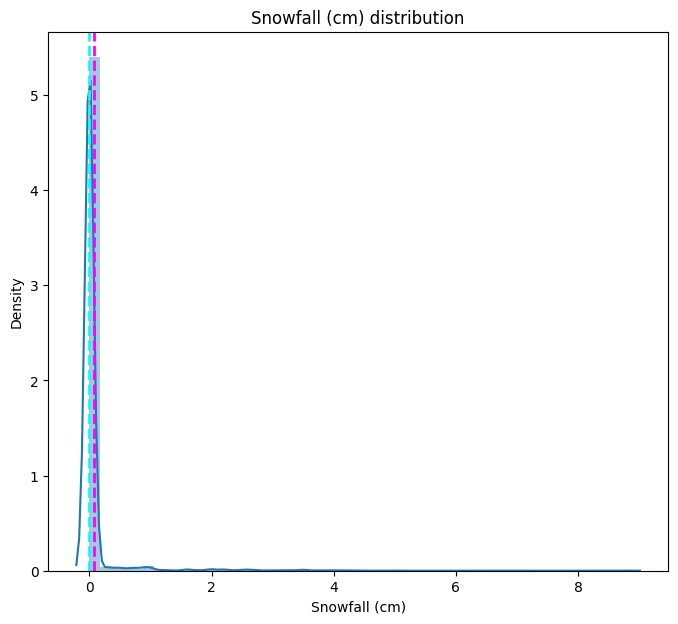

In [32]:
#analyzing distribution of continous independent variables
for col in continous_var:
  plt.figure(figsize=(8,7))
  sns.distplot(df[col])
  plt.xlabel(col)
  plt.title(col + ' distribution')
  plt.axvline(df[col].mean(),color= 'magenta',linestyle= 'dashed', linewidth= 2)
  plt.axvline(df[col].median(),color= 'cyan',linestyle= 'dashed', linewidth= 2)
  plt.show()

From visualizing the continous independent variable we can that:



*   Normarly distributed variables: Temprature , Humidity
*   Positively skewed variables: Wind speed , rainfall, snowfall,solar radiation
*   Negatively skewed variables: Visibility






##*Analyzing the relationship between the dependent variable and continous indepedent variable*

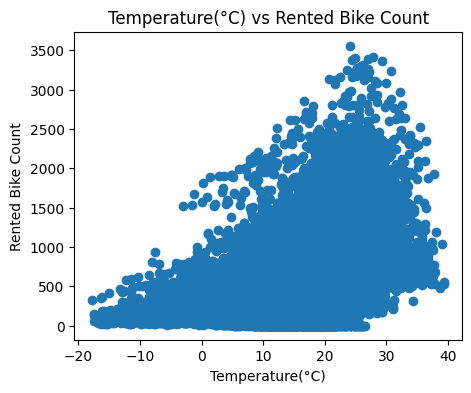

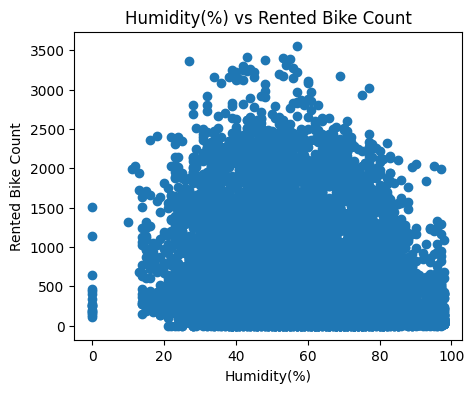

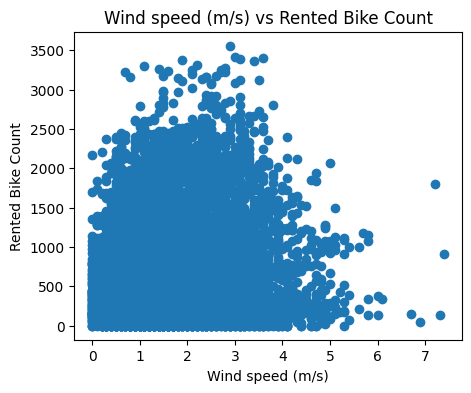

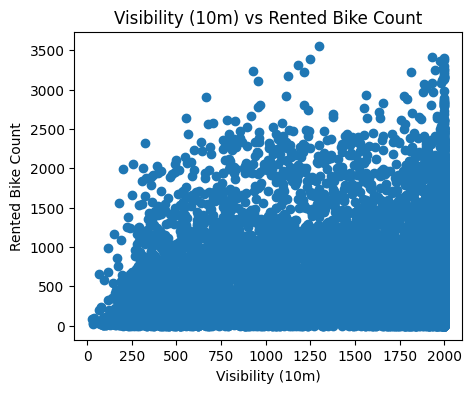

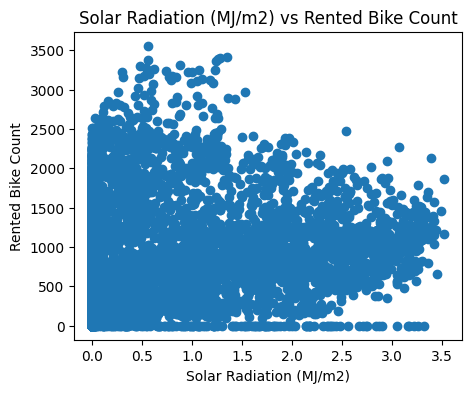

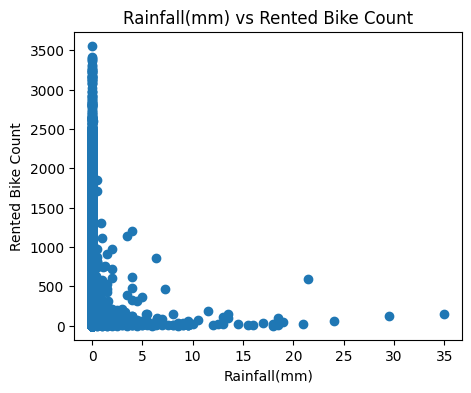

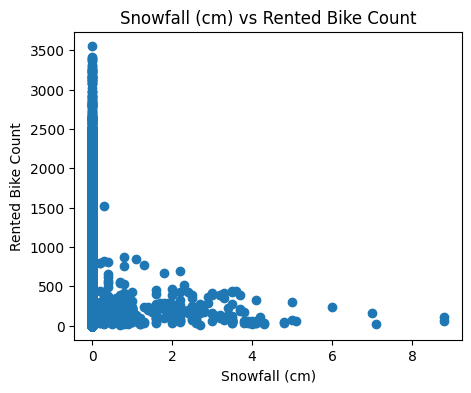

In [33]:
for col in continous_var:
  plt.figure(figsize=(5,4))
  plt.scatter(x=col,y=dependent_variable[0],data =df)
  plt.xlabel(col)
  plt.ylabel(dependent_variable[0])
  plt.title(col+ ' vs ' +dependent_variable[0])

We can infer from the above visualization that:


*   Positively correlated variables: temperature, windspeed, visibility, solar radiation.
*   Negatively correlated variables: Humidity , Rainfall and snowfall.



##*Analyzing the relationship between dependent variable and categorical variable*

In [34]:
#categorical variables
categorical_var =['Hour','Seasons',	'Holiday'	,'Functioning Day',	'Month',	'weekdays_weekend']

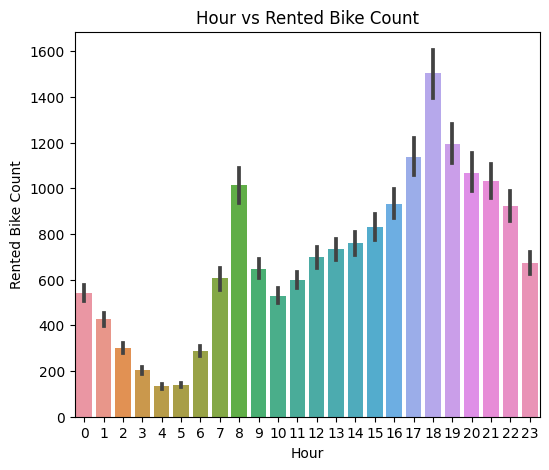

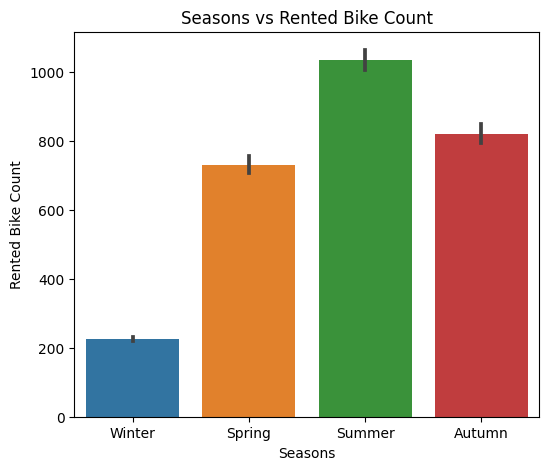

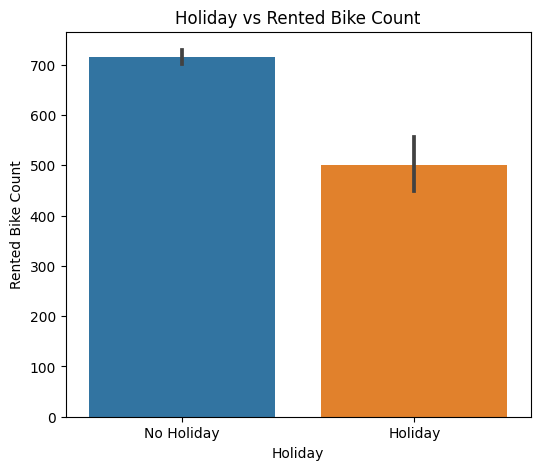

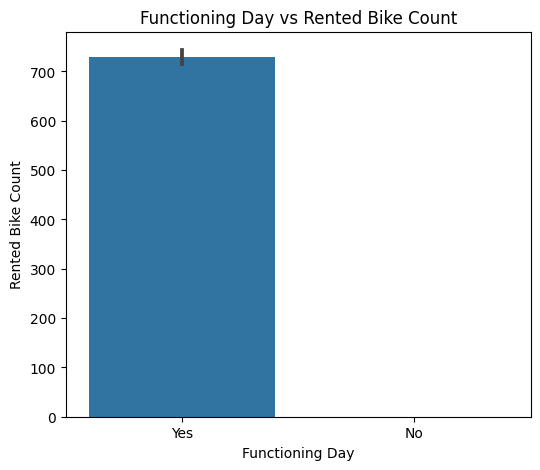

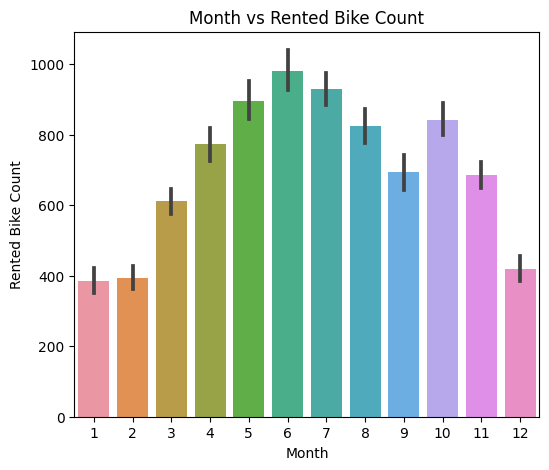

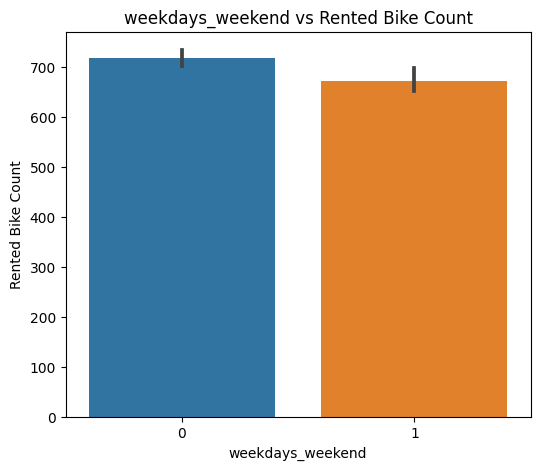

In [35]:
#visualizing categorical variables
for col in categorical_var:
  plt.figure(figsize=(6,5))
  sns.barplot(x=col,y=dependent_variable[0],data=df)
  plt.xlabel(col)
  plt.ylabel(dependent_variable[0])
  plt.title(col+' vs '+dependent_variable[0])
  plt.show()


From the visualiztion we can infer that:


* The number of bikes rented is on average higher during the rush hours.  
* The rented bike counts is higher during the summer and lowest during the winter.
* The rented bike count is higher on working days than on non working days.
* On a non functioning day, no bikes are rented in all the instances of the data.
* The rented bike count is more in weekdays than weekends.








##*Correlation Analysis*

<Axes: title={'center': 'Correlation Analysis'}>

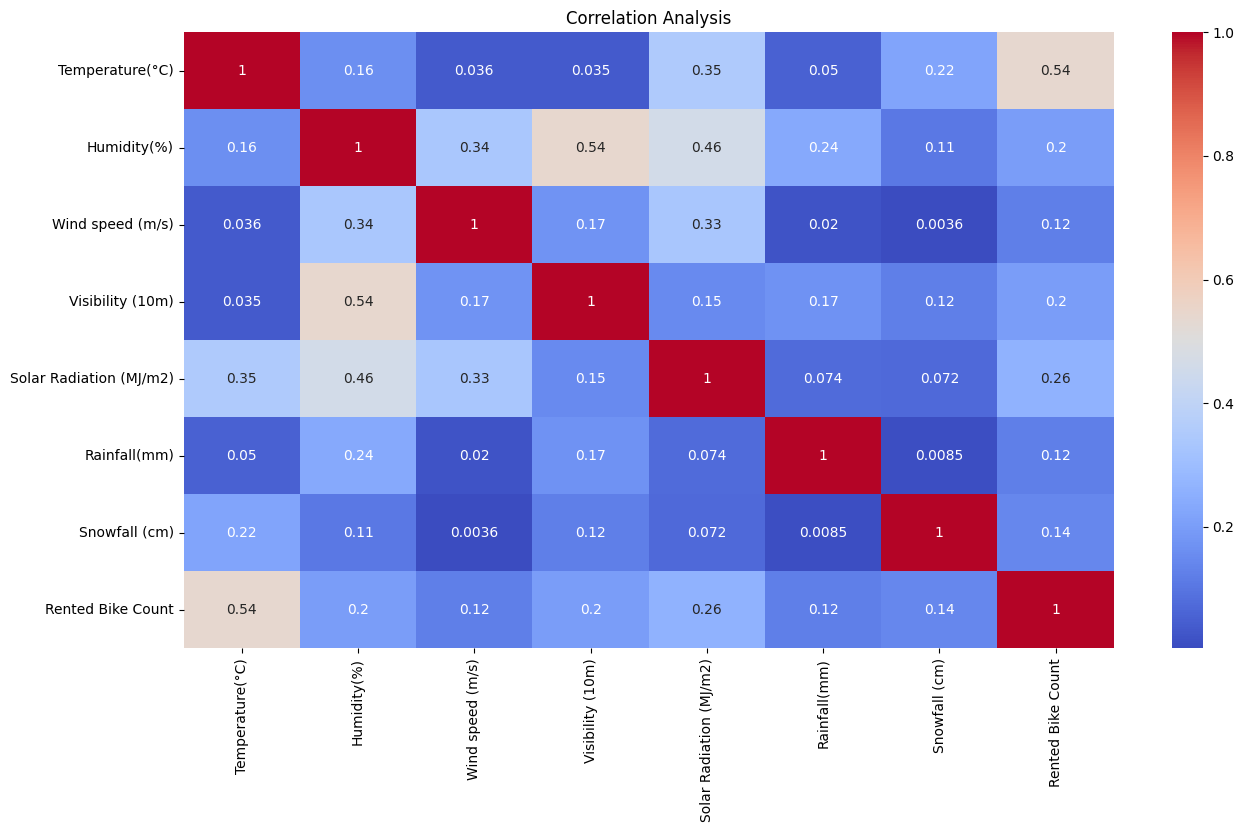

In [36]:
 ## Correlation magnitude for continuous variables
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continous_var+dependent_variable].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

There is no multi-collinearity in the data

##*Outlier analysis*

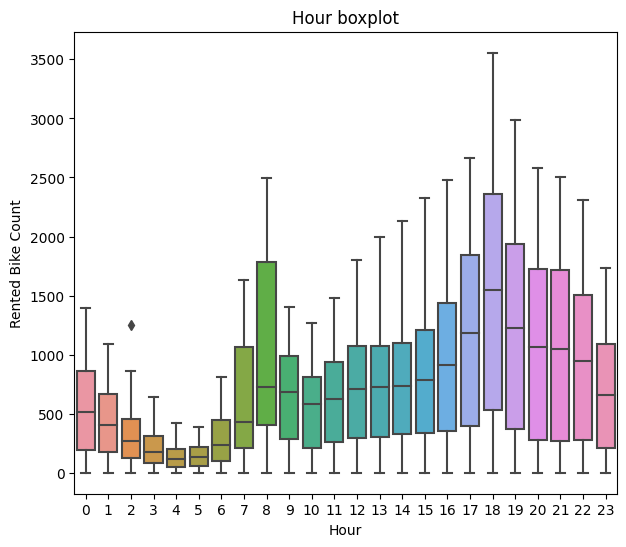

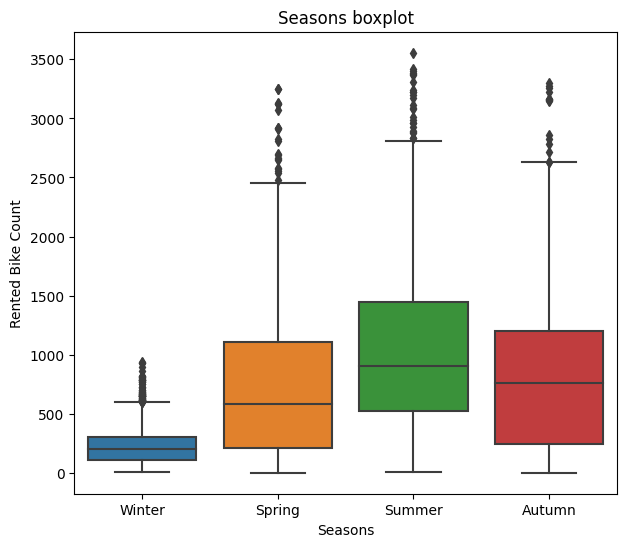

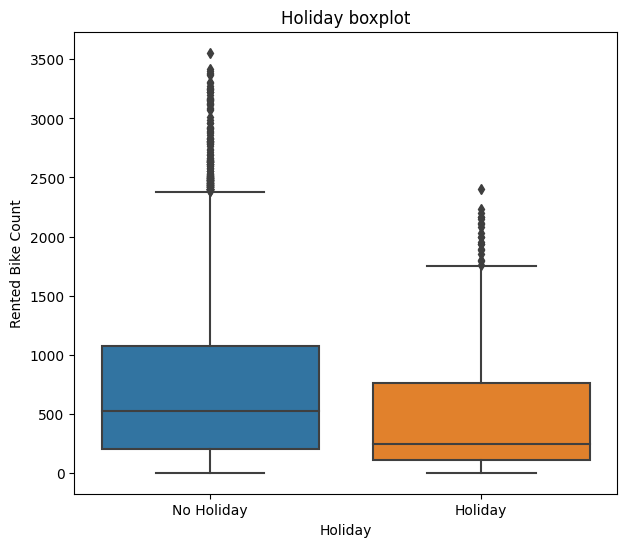

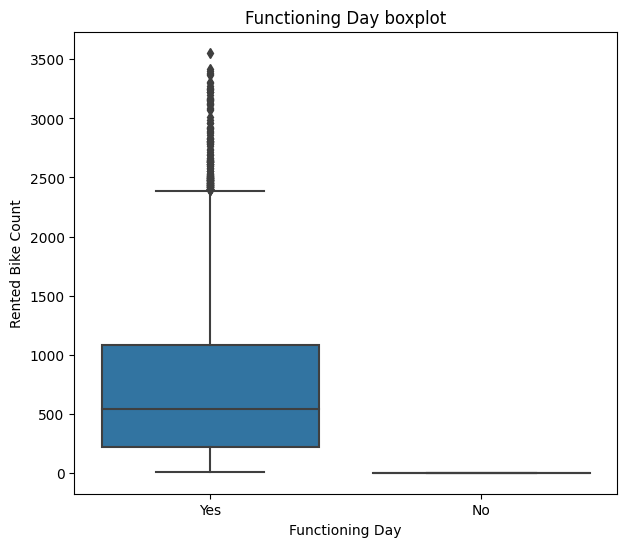

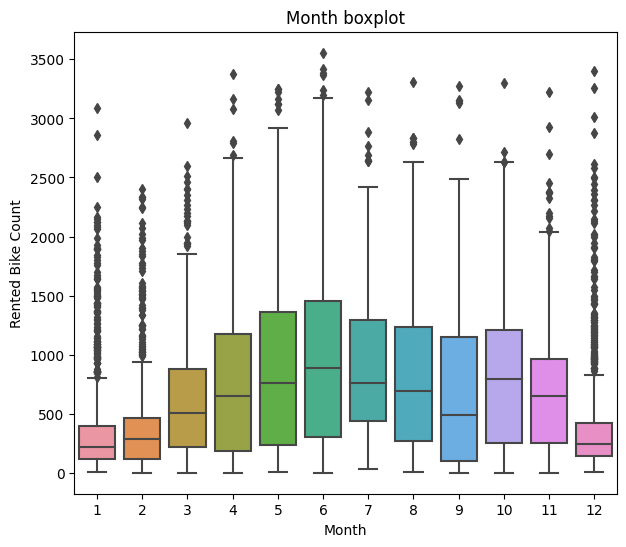

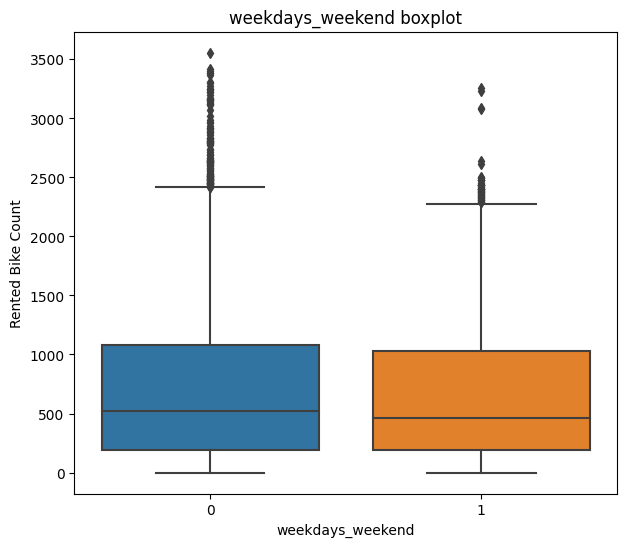

In [37]:
for col in categorical_var:
  plt.figure(figsize=(7,6))
  sns.boxplot(x=col,y=dependent_variable[0],data=df)
  plt.xlabel(col)
  plt.ylabel(dependent_variable[0])
  plt.title(col+' boxplot')
  plt.show()

There are outliers in the data and this must be taken into consideration in the model building phase.

##*Bike demand throughtout the day*

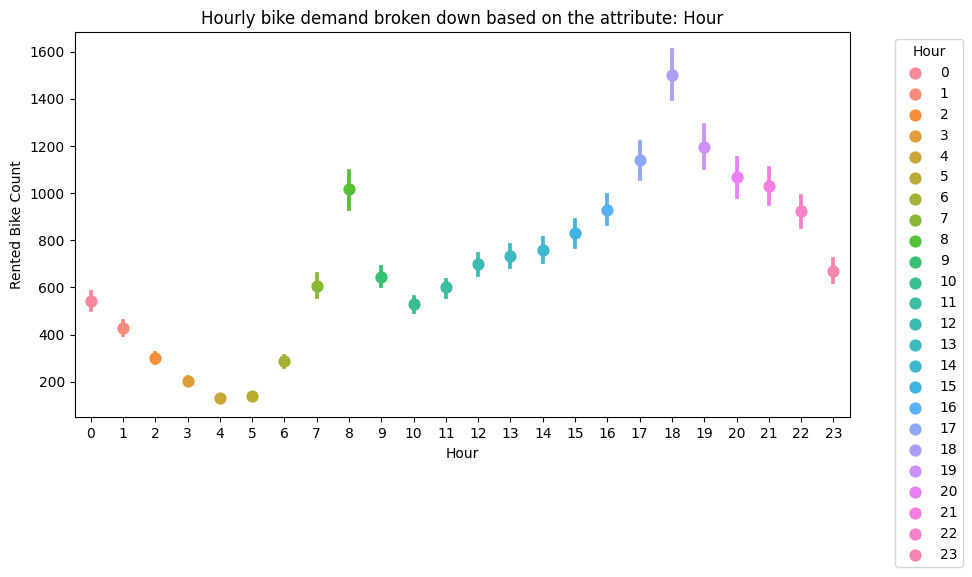

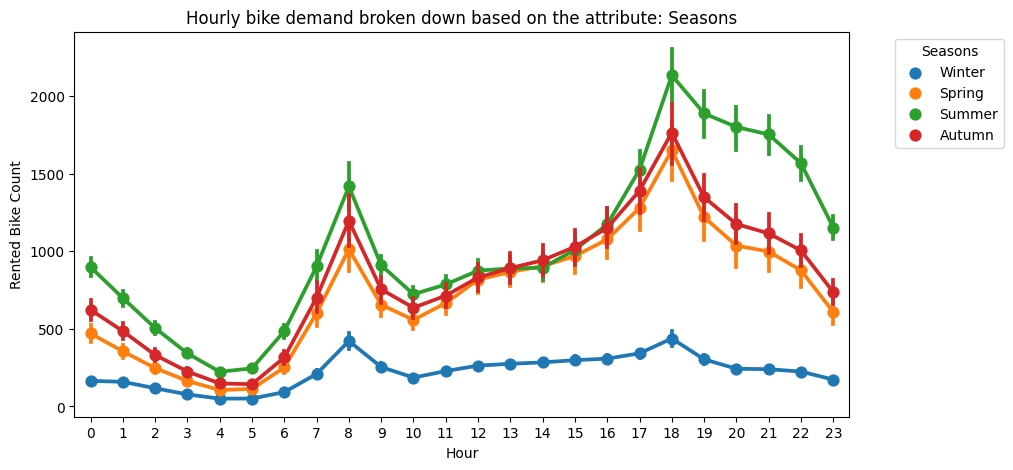

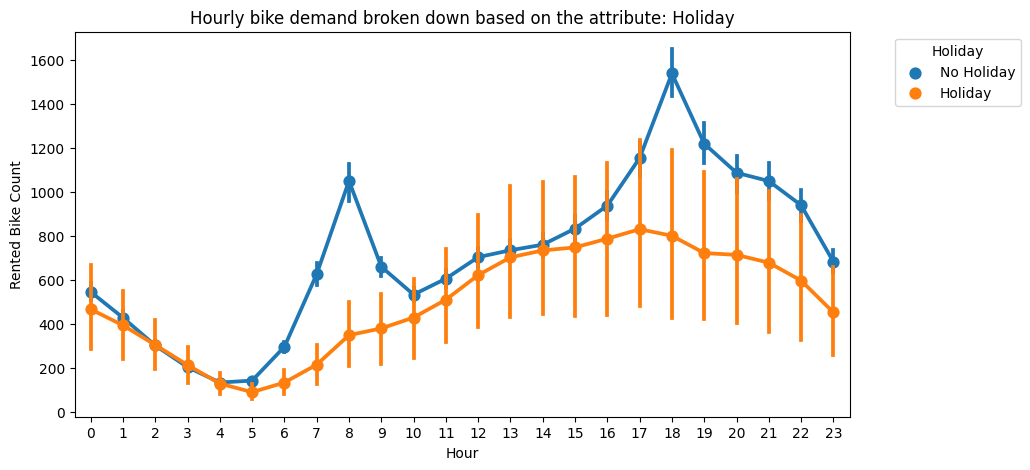

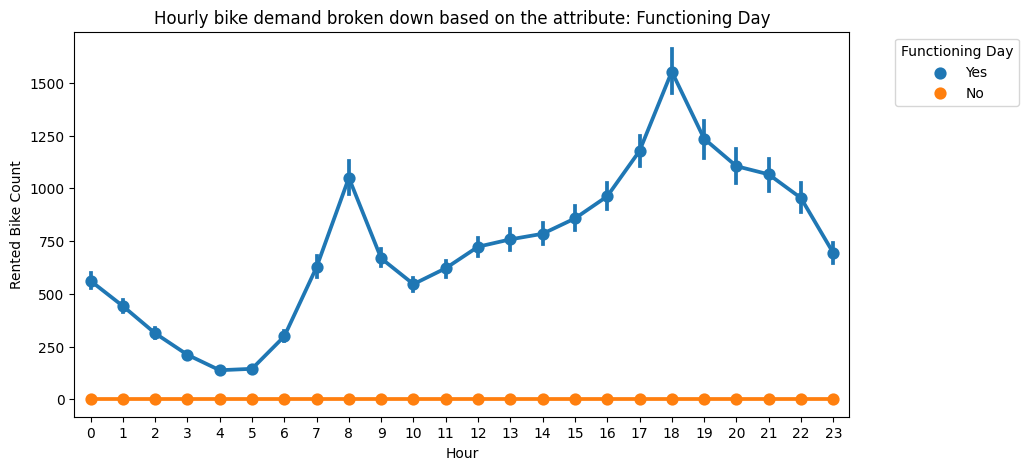

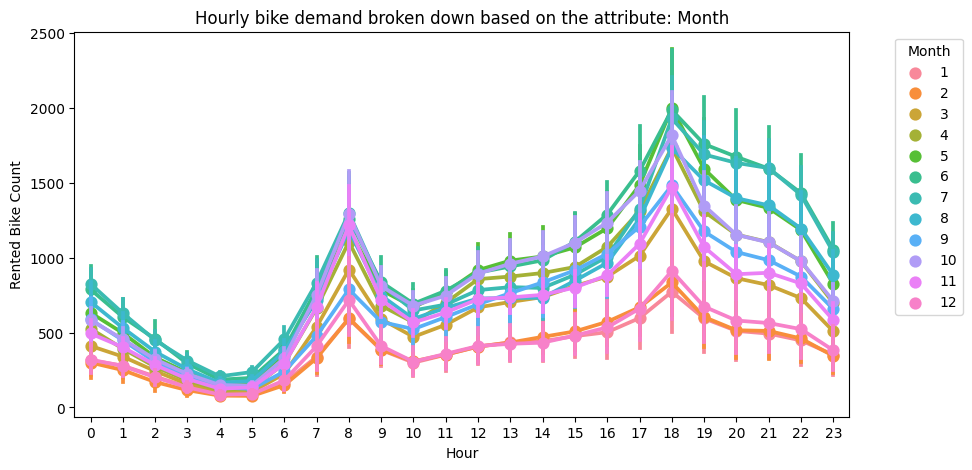

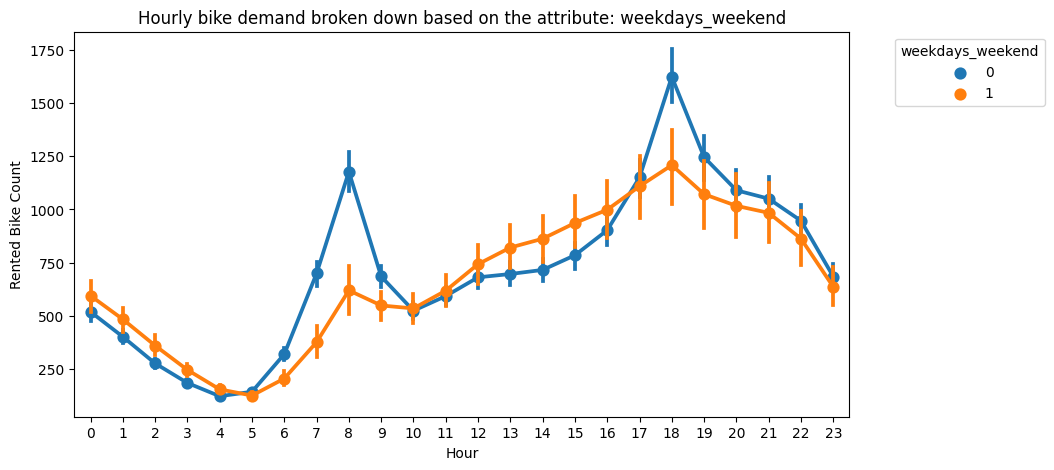

In [38]:
for i in categorical_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

From the visualization we can infer that:


*   In winters the overall demand for rented bikes is comparitively lower than that of other seasons.
*   On a non functioning day, no bikes are rented.
*   The demand for rented bikes throughout the day on holidays and weekends follow a different pattern than other days. On regular days, the demand for the bikes is higher during rush hours. On holidays or weekends, the demand is comparitively lower in the mornings, and is higher in the afternoons









In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Month                    8760 non-null   int64  
 13  weekdays_weekend         8760 non-null   int64  
dtypes: float64(5), int64(6),

#*Let's do one hot encoding*

In [40]:
# converting categorical values into dummies
df = pd.get_dummies(df,columns=['Hour','Seasons',	'Holiday',	'Functioning Day',	'Month',	'weekdays_weekend'])

In [41]:
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday',
       'Functioning Day_No', 'Functioning Day_Yes', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'weekdays_weekend_0',
       'weekdays_weekend_1'],
      dtype='object')

In [42]:
df.shape

(8760, 54)

We did one hot encoding because ML model does not take categorical variables to train the model

#*Data preprocessing*

In [43]:
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_0,Hour_1,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays_weekend_0,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
x= df.drop(columns=['Rented Bike Count'],axis =1)
y = np.sqrt(df['Rented Bike Count'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Hour_0                   8760 non-null   uint8  
 9   Hour_1                   8760 non-null   uint8  
 10  Hour_2                   8760 non-null   uint8  
 11  Hour_3                   8760 non-null   uint8  
 12  Hour_4                   8760 non-null   uint8  
 13  Hour_5                   8760 non-null   uint8  
 14  Hour_6                  

#*ML model*

###*Linear Regression*

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

In [48]:
from sklearn .preprocessing import StandardScaler

In [49]:
std = StandardScaler()

In [50]:
x_train_scaled = std.fit_transform(x_train)
x_test_scaled= std.transform(x_test)
print(f'x_train_scaled:{x_train_scaled}')
print(f'x_test_scaled:{x_test_scaled}')

x_train_scaled:[[-0.38874606  0.18996015 -1.08168277 ... -0.30347835  0.63637405
  -0.63637405]
 [ 1.29850393 -0.05608294  0.64784699 ... -0.30347835  0.63637405
  -0.63637405]
 [ 1.42379477 -0.05608294 -0.02474792 ... -0.30347835  0.63637405
  -0.63637405]
 ...
 [ 1.05627497 -0.05608294  0.07133707 ... -0.30347835  0.63637405
  -0.63637405]
 [-0.38039334  0.0423343   0.35959203 ... -0.30347835  0.63637405
  -0.63637405]
 [-0.48062601  1.22334111  1.51261186 ... -0.30347835 -1.57140285
   1.57140285]]
x_test_scaled:[[-0.17992799  0.73125494 -0.40908786 ... -0.30347835 -1.57140285
   1.57140285]
 [ 0.73887151  0.97729803 -0.69734282 ... -0.30347835 -1.57140285
   1.57140285]
 [-0.7729713   0.337586    2.47346173 ... -0.30347835  0.63637405
  -0.63637405]
 ...
 [-0.2551025   1.37096697 -0.40908786 ... -0.30347835  0.63637405
  -0.63637405]
 [-0.04628443  0.337586   -0.02474792 ... -0.30347835  0.63637405
  -0.63637405]
 [-0.21333888  0.43600324 -0.21691789 ... -0.30347835  0.63637405
  -

In [51]:
from sklearn.linear_model import LinearRegression
## cross validation
from sklearn.model_selection import cross_val_score

In [52]:
model = LinearRegression()

In [53]:
model.fit(x_train,y_train)

LinearRegression()

In [54]:
mse= cross_val_score(model, x_train,y_train,scoring= 'neg_mean_squared_error',cv= 10)
mse

array([-34.18210261, -35.41933126, -38.70930098, -37.80420741,
       -37.12254209, -36.1715068 , -42.58408555, -40.23143904,
       -44.04977087, -34.93547209])

In [55]:
np.mean(mse)

-38.12097586927085

In [56]:
y_train_pred= model.predict(x_train)
y_train_pred

array([15.57216263, 41.98592567, 28.47897148, ..., 33.25625992,
       22.59231949, 22.94245148])

In [57]:
y_test_pred= model.predict(x_test)
y_test_pred

array([15.09627724, 23.49729919, 20.47392845, ..., 19.86288834,
       33.42279243, 27.10099983])

<ipython-input-58-2858f1138790>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred-y_test, kde =True)


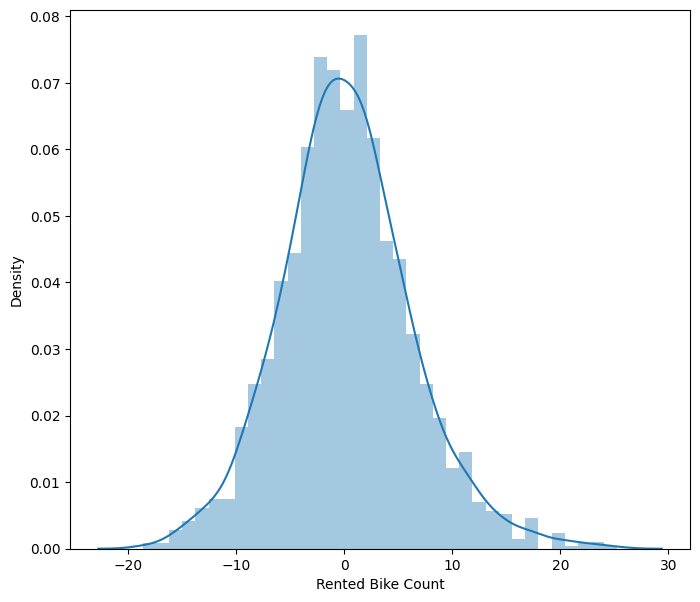

In [58]:
plt.figure(figsize=(8,7))
sns.distplot(y_test_pred-y_test, kde =True)
plt.show()

<ipython-input-59-70ed4e629815>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_pred-y_train, kde =True)


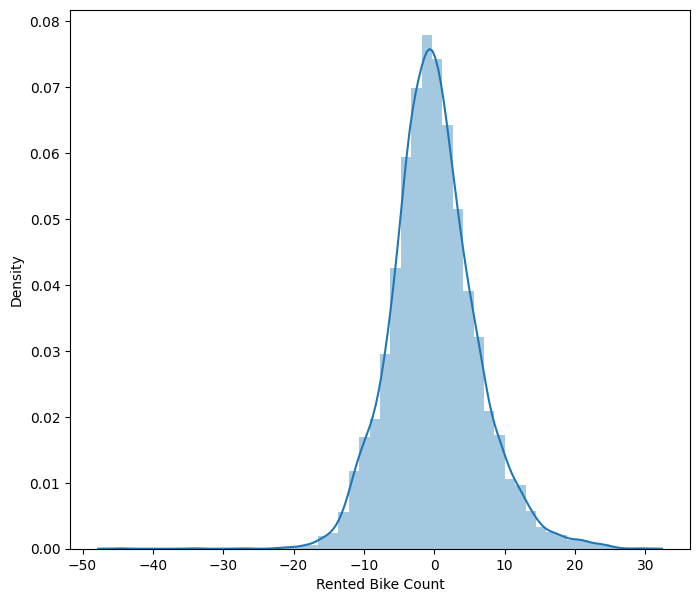

In [59]:
plt.figure(figsize=(8,7))
sns.distplot(y_train_pred-y_train, kde =True)
plt.show()

In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [61]:
# r2 score of training data ad test data
score_1 = r2_score(y_train_pred,y_train)
score_2 = r2_score(y_test_pred,y_test)
print(f'r2 score of training data : {score_1}')
print(f'r2 score of test data : {score_2}')

r2 score of training data : 0.6803415786036843
r2 score of test data : 0.6876703826008399


In [62]:
# mean_squared_error of training data and test data
mse_1= mean_squared_error(y_train_pred,y_train)
rmse_1 = np.sqrt(mse_1)
mse_2= mean_squared_error(y_test_pred,y_test)
rmse_2 = np.sqrt(mse_2)
print(f'Root_mean_squared_error of train data:{rmse_1}')
print(f'Root_mean_squared_error of test data:{rmse_2}')


Root_mean_squared_error of train data:6.114228001342135
Root_mean_squared_error of test data:6.09682961028822


###*Ridge Regression*

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [64]:
ridge_regressor = Ridge()
ridge_regressor

Ridge()

In [65]:
parameters ={'alpha': [1,2,5,10,20,30,40,50,60,70,80,90,100]}
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                   100]},
             scoring='neg_mean_squared_error')

In [66]:
print(ridgecv.best_params_)

{'alpha': 2}


In [67]:
print(ridgecv.best_score_)

-38.08671002431119


In [68]:
ridge_train_pred = ridgecv.predict(x_train)
print(ridge_train_pred)

[15.57131251 41.90486195 28.54607595 ... 33.22047564 22.58881919
 22.88172544]


In [69]:
ridge_test_pred = ridgecv.predict(x_test)
print(ridge_test_pred)

[15.13752602 23.50392257 20.48678295 ... 19.83918668 33.37360561
 27.08262209]


In [70]:
score_1 = r2_score(ridge_train_pred,y_train)
score_2 = r2_score(ridge_test_pred,y_test)
print(f'r2 score of training data : {score_1}')
print(f'r2 score of test data : {score_2}')

r2 score of training data : 0.6785931021173581
r2 score of test data : 0.6857805191342068


In [71]:
mse_train=mean_squared_error(ridge_train_pred,y_train)
rmse_train= np.sqrt(mse_train)
print(f'mse_train:{mse_train}')
print(f'rmse_train:{rmse_train}')

mse_test=mean_squared_error(ridge_test_pred,y_test)
rmse_test= np.sqrt(mse_test)
print(f'mse_test:{mse_test}')
print(f'rmse_test:{rmse_test}')

mse_train:37.38602519422712
rmse_train:6.114411271269469
mse_test:37.181409781369496
rmse_test:6.097656089135357


###*Lasso Regression*

In [72]:
from sklearn. linear_model import Lasso

In [73]:
lasso_regressor= Lasso()

In [74]:
parameters ={'alpha': np.arange(10,50)}
lassocv = GridSearchCV(lasso_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])},
             scoring='neg_mean_squared_error')

In [75]:
print(lassocv.best_params_)

{'alpha': 10}


In [76]:
print(lassocv.best_score_)

-94.65540322379611


In [77]:
lasso_train_pred=lassocv.predict(x_train)
lasso_train_pred

array([19.18237394, 32.64735147, 33.43648189, ..., 29.86295531,
       21.56160406, 15.52940653])

In [78]:
lasso_test_pred=lassocv.predict(x_test)
lasso_test_pred

array([20.96645318, 26.11652771, 17.21387812, ..., 18.65242134,
       22.94738925, 21.60040063])

In [79]:
mse_train=mean_squared_error(lasso_train_pred,y_train)
rmse_train= np.sqrt(mse_train)
print(f'mse_train:{mse_train}')
print(f'rmse_train:{rmse_train}')

mse_test=mean_squared_error(lasso_test_pred,y_test)
rmse_test= np.sqrt(mse_test)
print(f'mse_test:{mse_test}')
print(f'rmse_test:{rmse_test}')

mse_train:94.54172829912886
rmse_train:9.723257082846718
mse_test:99.98634352518557
rmse_test:9.999317152945274


In [80]:
score_1 = r2_score(lasso_train_pred,y_train)
score_2 = r2_score(lasso_test_pred,y_test)
print(f'r2 score of training data : {score_1}')
print(f'r2 score of test data : {score_2}')

r2 score of training data : -1.0418748599105494
r2 score of test data : -1.2525878268084396


###*Decision tree regressor*

In [81]:
from sklearn .tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
tree_regressor = DecisionTreeRegressor(random_state=0)

In [82]:
parameters = {'max_depth':np.arange(20,26),
             'min_samples_leaf':np.arange(30,41,2)
             }

In [83]:
treecv = GridSearchCV(tree_regressor,parameters,scoring='neg_root_mean_squared_error',cv=5)
treecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([20, 21, 22, 23, 24, 25]),
                         'min_samples_leaf': array([30, 32, 34, 36, 38, 40])},
             scoring='neg_root_mean_squared_error')

In [84]:
print(treecv.best_params_)

{'max_depth': 25, 'min_samples_leaf': 30}


In [85]:
y_train_pred=treecv.predict(x_train)
print(y_train_pred)

[21.3736164  48.31434088 29.46336239 ... 32.53830515 14.79102927
 14.86133688]


In [86]:
y_test_pred=treecv.predict(x_test)
print(y_test_pred)

[15.49567482 22.75629457 19.14627125 ... 28.41262201 35.05450609
 35.05450609]


In [87]:
from sklearn.metrics import mean_squared_error,r2_score

In [107]:
mse_train = mean_squared_error(y_train,y_train_pred)
mse_train
rmse_train=np.sqrt(mse_train)
rmse_train
print(f'mse_train:{mse_train}')
print(f'rmse_train:{rmse_train}')

mse_train:19.250528106395766
rmse_train:4.387542376592592


In [88]:
mse_test = mean_squared_error(y_test,y_test_pred)
mse_test
rmse_test=np.sqrt(mse_test)
rmse_test
print(f'mse_test:{mse_test}')
print(f'rmse_test:{rmse_test}')

mse_test:31.743169962581213
rmse_test:5.6341077343782855


In [89]:
train_r2_score= r2_score(y_train_pred,y_train)
test_r2_score= r2_score(y_test_pred,y_test)
print(f'train_r2_score:{train_r2_score}')
print(f'test_r2_score:{test_r2_score}')


train_r2_score:0.8236601680385536
test_r2_score:0.7587883046268766


our model is performing well on both the training and test data.
The training R2 score is higher than the test R2 score, which is generally a good sign. It suggests that our model is fitting the training data well and is also generalizing reasonably well to unseen test data.
The difference between the training and test R2 scores is not extremely large, which indicates that your model is not significantly overfitting.
The test R2 score of 0.759 suggests that our model is capturing a substantial amount of the underlying patterns in the test data as well.

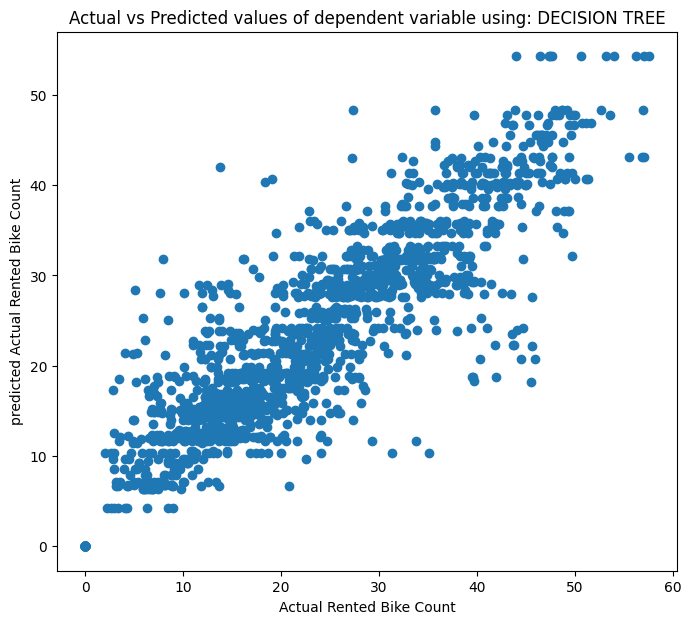

In [92]:
#scatter plot between actual and pedicted values
plt.figure(figsize=(8,7))
plt.scatter(x= y_test,y= y_test_pred)
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("predicted Actual Rented Bike Count")
plt.title('Actual vs Predicted values of dependent variable using: DECISION TREE')
plt.show()


Scatter plot of the actual and predicted values of the dependent variable on test data using decision tree.

###*Random forests*

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rf = RandomForestRegressor(random_state=0)


In [96]:
parameters={'n_estimators':[500],'min_samples_leaf':np.arange(25,31)}

In [101]:
rf_cv = GridSearchCV(rf,parameters,scoring= "neg_root_mean_squared_error",cv=5)


In [102]:
rf_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'min_samples_leaf': array([25, 26, 27, 28, 29, 30]),
                         'n_estimators': [500]},
             scoring='neg_root_mean_squared_error')

In [103]:
print(rf_cv.best_params_)

{'min_samples_leaf': 25, 'n_estimators': 500}


In [113]:
y_rf_train_pred=rf_cv.predict(x_train)
print(y_train_pred)

[21.61685846 48.79722408 29.08685918 ... 32.82249504 21.4565956
 16.35613581]


In [114]:
y_rf_test_pred=treecv.predict(x_test)
print(y_test_pred)

[15.49567482 22.75629457 19.14627125 ... 28.41262201 35.05450609
 35.05450609]


In [115]:
rf_mse_train = mean_squared_error(y_train,y_rf_train_pred)

rf_rmse_train=np.sqrt(mse_train)

print(f'rf_mse_train:{rf_mse_train}')
print(f'rf_rmse_train:{rf_rmse_train}')

rf_mse_train:19.250528106395766
rf_rmse_train:4.387542376592592


In [116]:
rf_mse_test = mean_squared_error(y_test,y_rf_test_pred)
rf_rmse_test=np.sqrt(rf_mse_test)
print(f'rf_mse_test:{rf_mse_test}')
print(f'rf_rmse_test:{rf_rmse_test}')

rf_mse_test:31.743169962581213
rf_rmse_test:5.6341077343782855


In [117]:
rf__train_score = r2_score(y_train,y_rf_train_pred)
rf__test_score = r2_score(y_test,y_rf_test_pred)
print(f'rf__train_score: {rf__train_score}')
print(f'rf__test_score: {rf__test_score}')


rf__train_score: 0.8752663862728324
rf__test_score: 0.7984384762740482







* Both the training and test R2 scores are relatively high, which indicates that
our Random Forest model is performing well and is able to explain a substantial amount of the variance in both the training and test datasets.  
* The difference between the training and test R2 scores is not extremely large, suggesting that the model is not significantly overfitting. It is maintaining good generalization to unseen data.
*   Overall, based on these R2 scores, your Random Forest model seems to be a good fit for the data and is demonstrating strong predictive performance on both the training and test sets.





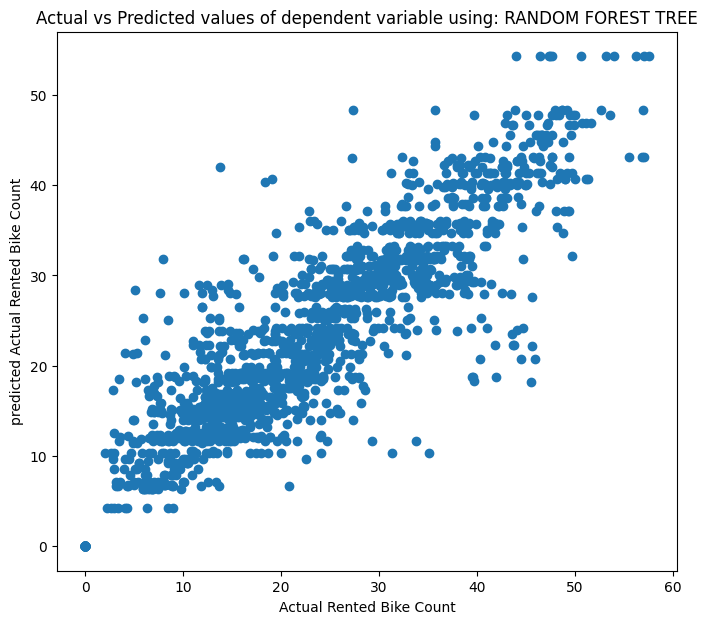

In [118]:
#scatter plot between actual and pedicted values
plt.figure(figsize=(8,7))
plt.scatter(x= y_test,y= y_rf_test_pred)
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("predicted Actual Rented Bike Count")
plt.title('Actual vs Predicted values of dependent variable using: RANDOM FOREST TREE')
plt.show()

Scatter plot of the actual and predicted values of the dependent variable on test data using random forests.

###*Gradient Boosting*